# Uber Supply Demand Gap

## INTRODUCTION

This data set is a **masked data set** which is similar to what data analysts at Uber handle. This will give us an idea about how problems are systematically solved using EDA and data visualisation. 

Many of us have some experience of travelling to and from the airport. Have you ever used Uber or any other cab service for this travel? Did you at any time face the problem of cancellation by the driver or non-availability of cars?

Well, if these are the problems faced by customers, these very issues also impact the business of Uber. If drivers cancel the request of riders or if cars are unavailable, Uber loses out on its revenue. 

So, as an analyst we need to decide we need to address the problem Uber is facing - driver cancellation and non-availability of cars leading to loss of potential revenue . This make a huge impact on the business of Uber.

**Let's start importing the common libraries that will be used in our dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## DATA DESCRIPTION

There are **six attributes** associated with each request made by a customer:

1.**Request id**: A unique identifier of the request

2.**Time of request**: The date and time at which the customer made the trip request

3.**Drop-off time**: The drop-off date and time, in case the trip was completed

4.**Pick-up point**: The point from which the request was made

5.**Driver id**: The unique identification number of the driver

6.**Status of the request**: The final status of the trip, that can be either completed, cancelled by the driver or no cars                                  available

In [2]:
### Reading the dataset with Pandas read_csv method
df1 = pd.read_csv(r"D:\Uber Supply Demand Gap\Uber Request Data.csv")

### Exploring the first five rows of the dataset
df1.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


#### General Overview of the dataset

**We note that the dataset has 6745 entries with 6 columns**

In [3]:
### Displaying the total number of rows & columns

df1.shape

(6745, 6)

### Let's look at the Summary of the dataset

In [4]:
### Dataset Summary
df1.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


Here, we note that the total number of Request id's allotted are **6745** and Driver id's allocation are **4095**. The driver id is unique for everyone.

The maximum Request id generated is **6766** and the maximum Driver id is **300**

# Checking the quality of the dataset

In [5]:
### Finding the missing value in the dataset

missing_data = df1.isnull().sum(axis=0).reset_index()
missing_data.columns = ['column_name', 'missing_count']
missing_data = missing_data[missing_data['missing_count']>0]     
missing_data = missing_data.sort_values(by='missing_count')
missing_data

,column_name,missing_count
2,Driver id,2650
5,Drop timestamp,3914


We observe that there are 2650 null values for Driver id and 3914 null values for Drop timestamp

In [6]:
### Calculating the  total no. of entries having NaN values
df1[(df1['Drop timestamp'].isnull())].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

The Total of No of Cars Cancelled & Status is 3914 which is the exact number of null values in the Drop timestamp. The Driver id and the Drop timestamp have null values for the requets that can not be served due to non availibililty of the cabs, so, it's important to keep the null values as they would tell us when Uber couldn't serve the request of a customer due to shortage in no. of cabs.

We can drop the column Driver id, as our main aim is to find how many times was the request made by passengers served or not, and not how many requests were served by a single driver.

In [7]:
### Dropping the Driver id column
df=df1.drop("Driver id", axis = 1)
df.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
0,619,Airport,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [8]:
### Let us check the unique values that are present in the Status column
df['Status'].unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

There are total three types of Categories of data present in the Status which include 'Trip Completed', 'Cancelled' & 'No Cars Available'. This shows the trip only from City to Airport and Airport to City.

In [9]:
### Checking the unique values present in Pickup point column
df['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

'Airport' & 'City' are the only two unique values which are present in the Pickup Point column.

 ## Deriving New Columns

In [10]:
### Let us derive some new variables which will be used for the analysis.

### Calculating hour from the Request timestamp
df['Request_Hour'] = pd.to_datetime(df['Request timestamp']).dt.hour


### Let's divide the timeslots into different categories like- Morning, Noon, Evening, Night, Dawn . 
df["TimeSlot"] = df["Request_Hour"].apply(lambda x: "Dawn" if x<=4 else (" Morning" if x<=9 else ("Noon" if x<=16 else (" Evening" if x<=21 else "Night"))))

### Let us now work on Supply & Demand. Supply is when the the cars are available(Cabs Availability) and the trip got completed else there is Demand.
df['Cabs_Availability'] = df['Status'].apply(lambda x: "Available" if x == 'Trip Completed' else 'Not Available')

df.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,Request_Hour,TimeSlot,Cabs_Availability
0,619,Airport,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,11,Noon,Available
1,867,Airport,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,17,Evening,Available
2,1807,City,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,9,Morning,Available
3,2532,Airport,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,21,Evening,Available
4,3112,City,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,8,Morning,Available


In [11]:
### Let's check the shape of the data now
df.shape

(6745, 8)

As we have successfully alloted the timeslots in which cab was requested. Now let's derive columns as **Cab Demand** & **Cab Supply**. Cab Demand will always have values as 1 and Cab Supply will show value as 1 when trip is completed else It shows as 0.

In [12]:
### Deriving columns Cab Demand , Cab Supply and assigning values to them.

df['Cab_Demand'] = 1
df['Cab_Supply'] = 0
df.loc[(df['Status']== 'Trip Completed'), 'Cab_Supply']=1

In [13]:
df.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,Request_Hour,TimeSlot,Cabs_Availability,Cab_Demand,Cab_Supply
0,619,Airport,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,11,Noon,Available,1,1
1,867,Airport,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,17,Evening,Available,1,1
2,1807,City,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,9,Morning,Available,1,1
3,2532,Airport,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,21,Evening,Available,1,1
4,3112,City,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,8,Morning,Available,1,1


## Identifying the most pressing problems for Uber


Text(0.5, 1.0, 'Frequency of request by hour')

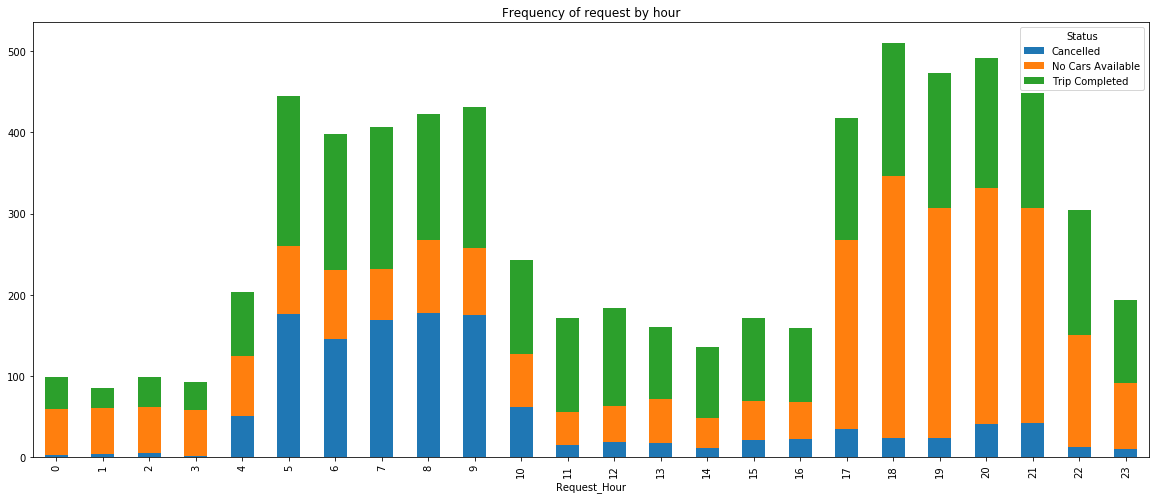

In [14]:
### Frequency of request by hour
### It tells us that the request made at a particular hour were completed, cancelled or No cabs were available.

df.groupby(['Request_Hour' ,'Status']).size().unstack().plot(kind = 'bar', stacked =True, figsize=(20,8))
plt.title("Frequency of request by hour")

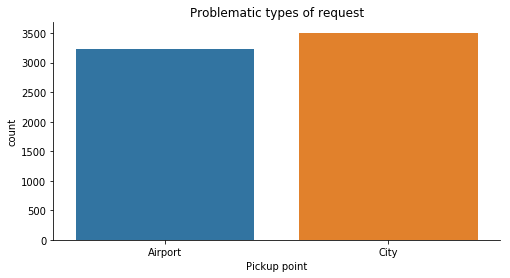

In [15]:
### Problematic Types of Request
### It displays the graph for the request of pickup point from Airport to City or City to Airport

plt.figure(figsize=(8,4))
sns.countplot(df['Pickup point'])
plt.title("Problematic types of request")
sns.despine()

We observe that about 3250 request where made from the Airport and about 3500 request were made  from the city.

In [16]:
### Stats for Pickup point column
df['Pickup point'].describe()

count     6745
unique       2
top       City
freq      3507
Name: Pickup point, dtype: object

As we see that there were slightly more number of pickups from the city for the airport rather than that from the airport to city.

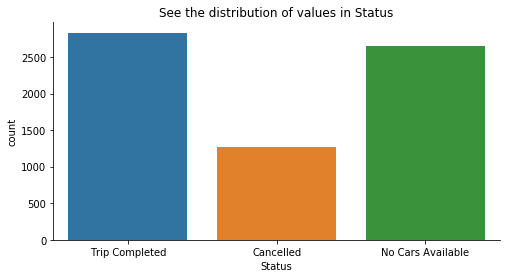

In [17]:
### plot to see the distribution of values in Status

plt.figure(figsize=(8,4))
sns.countplot(df['Status'])
plt.title("See the distribution of values in Status")
sns.despine()

In [18]:
### Stats for Status column
df['Status'].describe()

count               6745
unique                 3
top       Trip Completed
freq                2831
Name: Status, dtype: object

Number of trips completed is slightly more than the no. of times a cab was not available.

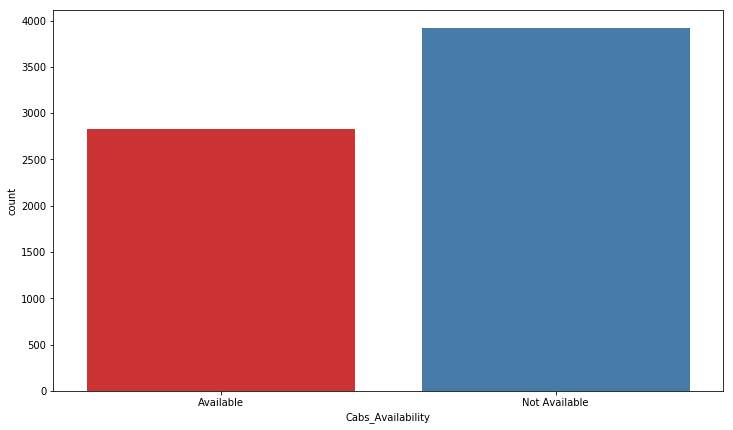

In [19]:
### plot distribution of the Cabs Availability
plt.rcParams['figure.figsize'] = (12,7)
sns.countplot(x= df['Cabs_Availability'], data = df, palette = 'Set1')

In [20]:
### Stats for Cabs Availability
df['Cabs_Availability'].describe()

count              6745
unique                2
top       Not Available
freq               3914
Name: Cabs_Availability, dtype: object

The above plot tells us that the how many cabs are Available or not. Cabs Availability shows that the Trips have been completed and Not Available shows that Trips Not Completed. 

Text(0, 0.5, '')

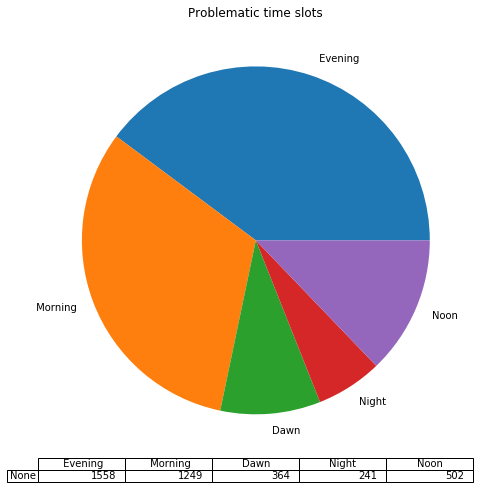

In [21]:
### Problematic Time Slots

df[(df["Cabs_Availability"]=="Not Available")].groupby(['TimeSlot']).size().plot(kind="pie",stacked=True,figsize=(8, 8),table=True,title="Problematic time slots")
plt.ylabel("")

As we know that we have divided the time slots into five categories. The above pie chart tells us about the Non Availability of cabs in different timeslots. From the table we can note the values of Cabs Non- Availability(Cancelled + No cabs Available). Non Availability of cars were more in the evening (i.e b/w 4pm - 9pm). At night the non-availability of cabs is least.

In [22]:
### import for mosaic plot
from statsmodels.graphics.mosaicplot import mosaic

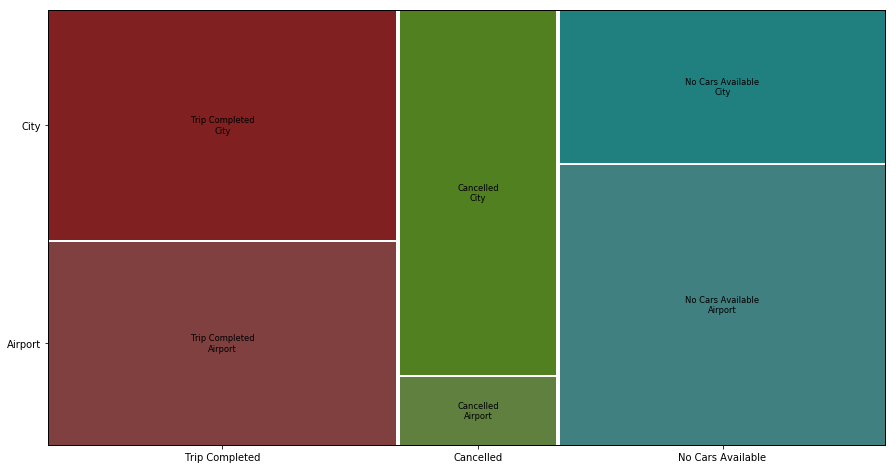

In [23]:
### Mosaic plot between Status & Pickup Point
plt.rcParams['figure.figsize'] = (15,8)
mosaic(df, ['Status', 'Pickup point'])
plt.show()

In [24]:
df[['Status','Pickup point']].describe()

,Status,Pickup point
count,6745,6745
unique,3,2
top,Trip Completed,City
freq,2831,3507


We observe that the **Trips Completed** from the City and the Airport are almost same. While more rides got **cancelled** at the City than the Airport. Also no of cabs not available for the rides from the Airport is comparatively larger than the rides not available from the city.

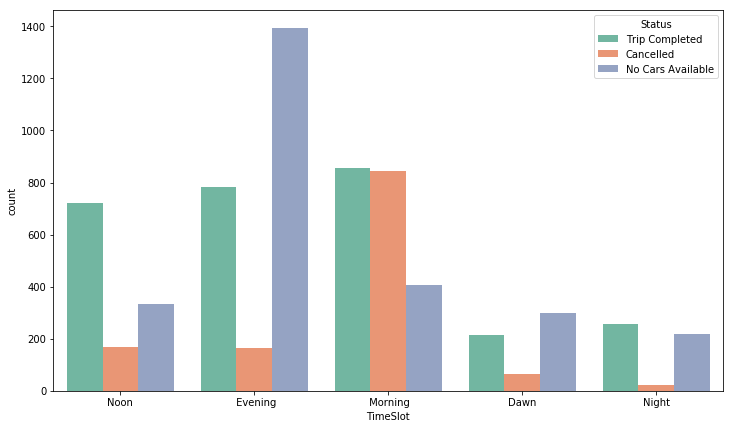

In [25]:
### PLot between Timeslot & Status
plt.rcParams['figure.figsize'] = (12,7)
sns.countplot(x= df['TimeSlot'], hue=df['Status'],  data = df, palette = 'Set2')

We note that most of the cabs were Available in the Evening time i.e from 5:00 PM- 9:00 PM

In [26]:
df[['TimeSlot','Status']].describe()

,TimeSlot,Status
count,6745,6745
unique,5,3
top,Evening,Trip Completed
freq,2342,2831


## Finding the Gap between Supply & Demand

Text(0.5, 1.0, 'Types of request from ciy to airport')

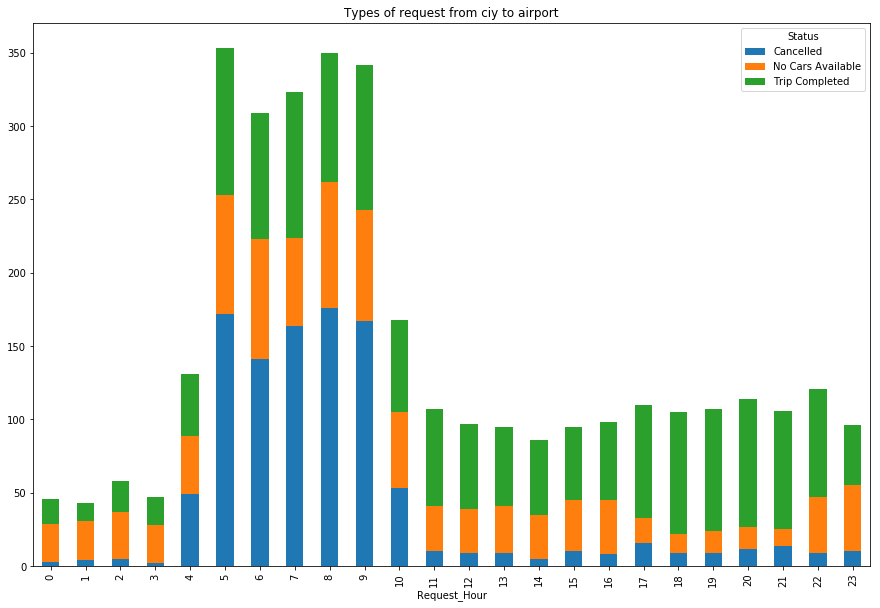

In [27]:
### Demand-Supply Gap from City to Airport

df[(df["Pickup point"]=="City")].groupby(['Request_Hour','Status']).size().unstack().plot(kind="bar",stacked=True,figsize=(15, 10))
plt.title("Types of request from ciy to airport")

We observe that At morning 5:00 am and 8:00 am ,  the demand of Uber cabs is very high. People need to travel from city to airport to catch their flights. At that time most of the cabs get cancelled which marks the huge impact on the business of Uber. They need to fix this problem. 

Text(0.5, 1.0, 'Types of request from Airport to City')

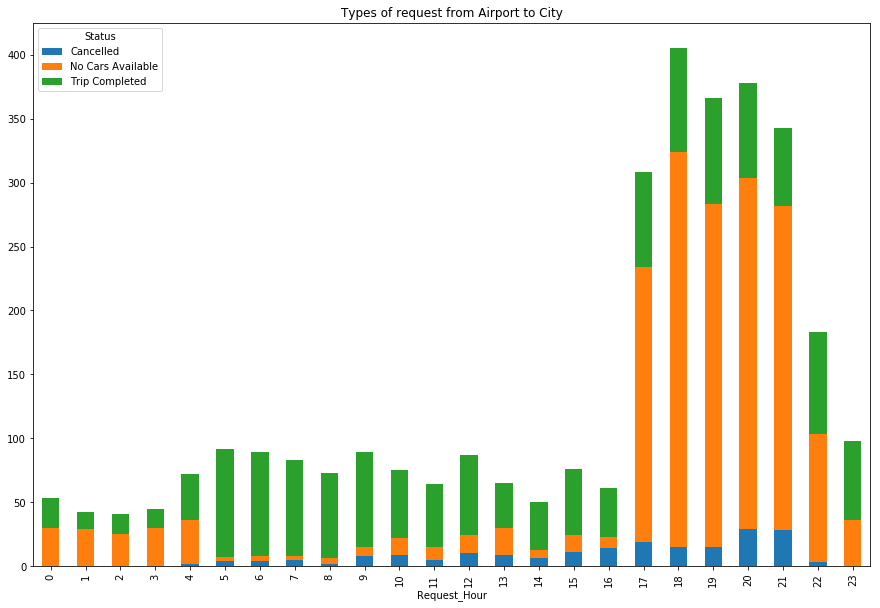

In [28]:
### Demand-Supply Gap from Airport to City

df[(df["Pickup point"]=="Airport")].groupby(['Request_Hour','Status']).size().unstack().plot(kind="bar",stacked=True,figsize=(15, 10))
plt.title("Types of request from Airport to City")

From the above bar graph we note that In the evening time there is more demand of cabs from Airport to city as the flights gets land more in evening time. People need cabs for travelling to the city. The main problem Uber needs to handle is that there is a huge gap between demand & Supply. When the demand of Cabs is moe in the evening time , it shows most of the cabs as unavailable or the cab gets cancelled by the driver.


Text(0.5, 1.0, 'TimeSlot where highest gap exist')

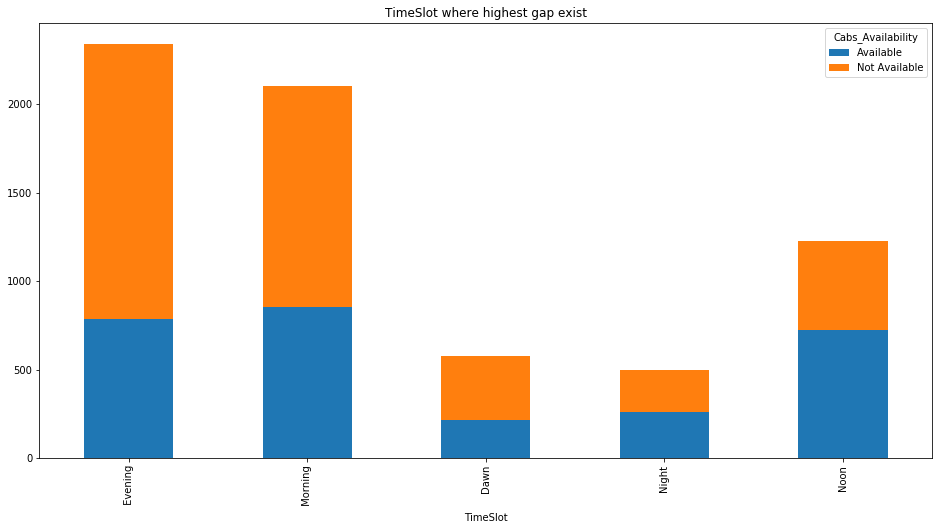

In [29]:
### Finding the time slots when the highest gap exists

df.groupby(['TimeSlot', 'Cabs_Availability']).size().unstack().plot(kind = 'bar', figsize= (16,8), stacked = True) 
plt.title("TimeSlot where highest gap exist")

The above graph tells us about the timeslots when the highest gap exist between Supply & Demand. In the morining we see that the supply of cabs is more. People might need to catch their early morning flights so they need to book the cab from city to the airport or more flights are coming at the airport early morning.

Text(0, 0.5, '')

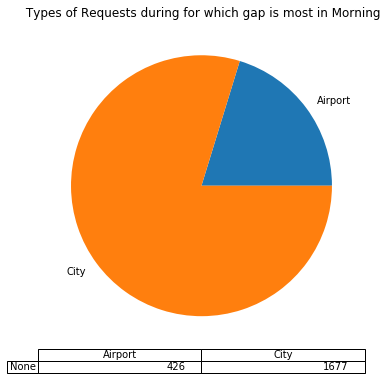

In [30]:
###  Types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots
### Let us check for Morning and Evening as request of cabs were made more at that time 

df[df["TimeSlot"]==" Morning"].groupby(['Pickup point']).size().plot(kind="pie",stacked=True,figsize=(6, 6),table=True,title=" Types of Requests during for which gap is most in Morning")
plt.ylabel("")

We observe that in Morning the request of the cabs were more in the City than the Airport. At city the total request made  were **1677** and at airport were **426** 

Text(0, 0.5, '')

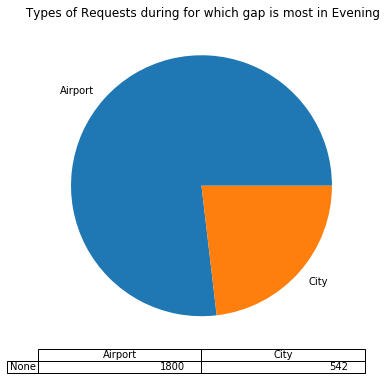

In [31]:
### Evening 
df[df["TimeSlot"]==" Evening"].groupby(['Pickup point']).size().plot(kind="pie",stacked=True,figsize=(6, 6),table=True,title=" Types of Requests during for which gap is most in Evening")
plt.ylabel("")

We observe that in Evening the request of the cabs were more in the Airport than the City. At city the total request made were **542** and at airport were **1800**

We see that from the Airport most of the cabs were not available from 5:0 PM to 9:00 PM. Also we see that higher number of trips were completed from city in the morning 5:00 AM to 9:00 AM.

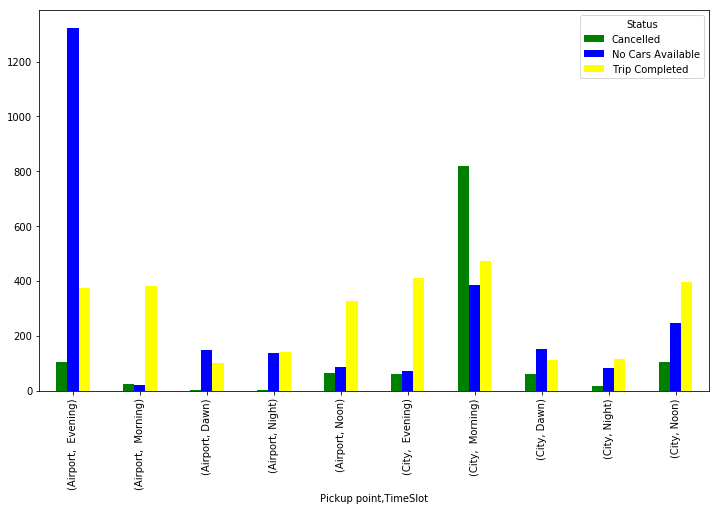

In [32]:
### PLot distribution between TimeSlot, Pickup point & Status
df= pd.DataFrame(df.groupby(['Pickup point','TimeSlot','Status'])['Request id'].count().unstack(fill_value = 0))
df.plot.bar(color = ['green','blue','yellow'])


In [33]:
##### Recommend some ways to resolve the supply-demand gap.

# Creating Incentives for the Cab drivers so they can work at high demand hours from Airport to City during Evening & City to Airport during Morning.
# We can direct the cabs from City to Airport to supply the high demand during the Morning Hours.
# Directing the Cabs from Airport to City to supply the high demand  during the Late Evening & Night Hours.
# Survey the reason behind the cancellation of cabs from City-Airport & Airport-City .

In [34]:
#####  What do you think is the reason for this issue for the supply-demand gap?

# The arrival and departure timing preferrances of the passengers are different. The demand for city pickup is high in morning. 
# However, the pickup demand from airport is more in the evening only. 
# Hence, the wait time for most drivers going to the airport in the morning would be very high as there are not much passengers. 
# So,  cab availability are low. Similarly, In the evening there aren’t enough cabs at the airport to meet the demand. 
# High wait time and no passenegers to carry out the trip is resulting in the gap between the  demand and supply. 

# CONCLUSION

##### As we know that there are is high demand of cabs for city in the morning and for the Airport in the Evening only. We can award the incentives to the cab drivers so that It encourages them to wait at the airport and the city. Drivers could be compensated for taking the night shifts, so that the quantity of drivers would be more. We tried to solve the most problematic types of request and the time slots and displaying the supply demand gap at the Airport & the City. 